In [1]:
from datasets.preprocessor import Preprocessor_2p5D
from datasets.utils import get_split_indices, liver_min_max
import torch
from load_config import load_config 


In [2]:
config = load_config()

In [3]:
config

{'unzipped_path': '/home/bigbrainman/APDS-final-project/data/unzipped',
 'cache_dir': '/home/bigbrainman/APDS-final-project/data/cache',
 'split_path': 'datasets/split.json',
 'split': {'train': 100, 'val': 10, 'test': 20},
 'slice_number': 5,
 'img_size': 512,
 'clip_lower': -200,
 'clip_upper': 200,
 'optimizer': 'adam',
 'n_res_blocks': 2,
 'batch_size': 8,
 'n_classes': 3,
 'dim_mults': [1, 2, 4, 8],
 'mask_classes': {'empty': 0, 'liver': 1, 'cancer': 2},
 'attn_heads': 4,
 'attn_head_dim': 32}

In [4]:
pre = Preprocessor_2p5D(config)

In [5]:
train_split, _, _, = get_split_indices('./datasets/split.json')

In [12]:

def get_liver_z_pct_bounds(seg):
    depth = seg.size(0)
    liver_start, liver_end = liver_min_max(seg)

    return (liver_start / depth).item(), (liver_end / depth).item()

In [7]:
dp = pre.process(train_split[1])
vol, seg = dp.full_vol, dp.full_seg

In [8]:
get_liver_z_pct_bounds(seg)

(tensor(0.5238), tensor(0.9333))

In [13]:
from tqdm import tqdm

maxes = []
mins = []

for scan_idx in tqdm(train_split):
    dp = pre.process(scan_idx)
    _, seg = dp.full_vol, dp.full_seg
    mn, mx = get_liver_z_pct_bounds(seg)
    maxes.append(mx)
    mins.append(mn)


 70%|███████   | 70/100 [04:48<01:38,  3.29s/it]

: 

: 

In [1]:
seg.shape

NameError: name 'seg' is not defined

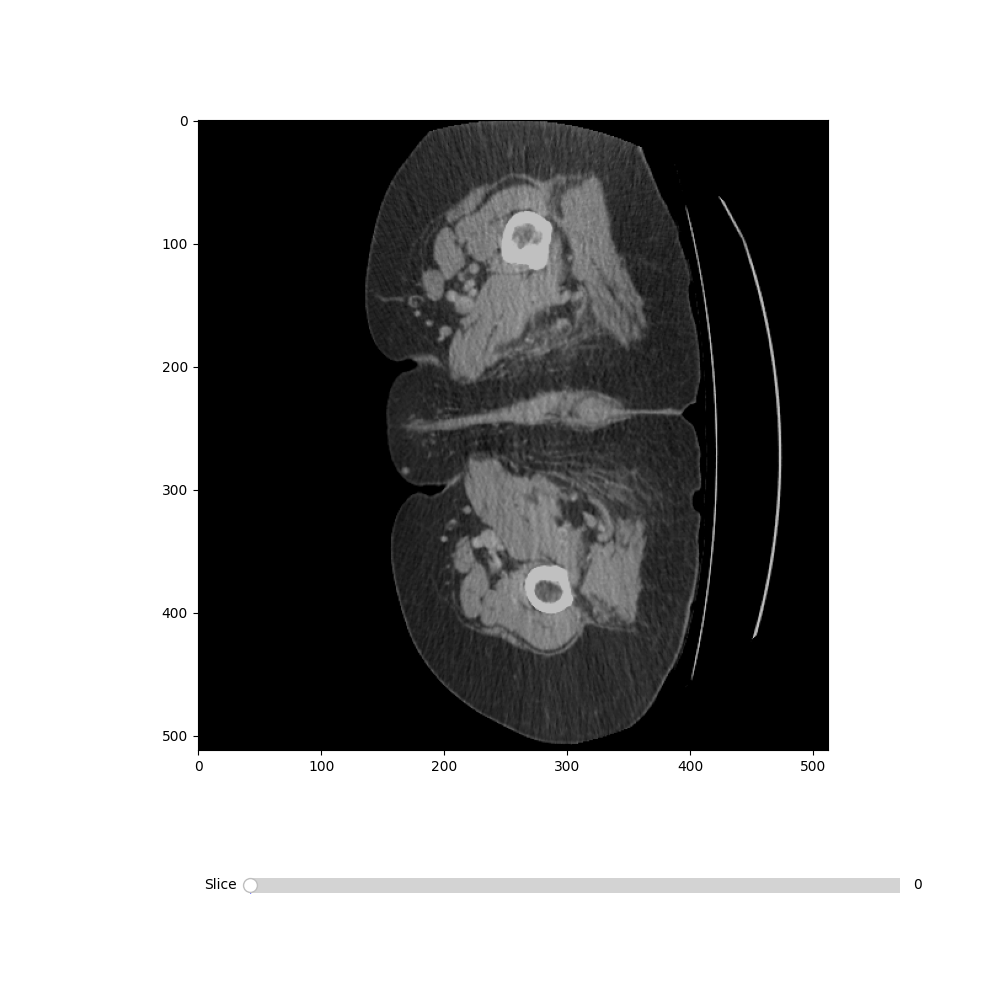

In [10]:
%matplotlib ipympl
from plotting.plotting import make_visual
make_visual(vol, seg)